# Análise de Dados

# Relatórios de vendas em diferentes cidades

 Índice
 1. [Extraindo os dados](#extraindo-os-dados)
 1. [Análise do Faturamento](#análise-dos-faturamentos)
 2. [Análise das lojas](#análise-das-lojas)
 1. [Visualização dos dados](#visualização-dos-dados)


## Extraindo os dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Relatórios de vendas em cada cidade
df_aracaju = pd.read_excel('datasets/Aracaju.xlsx')
df_fortaleza = pd.read_excel('datasets/Fortaleza.xlsx')
df_natal = pd.read_excel('datasets/Natal.xlsx')
df_recife = pd.read_excel('datasets/Recife.xlsx')
df_salvador = pd.read_excel('datasets/Salvador.xlsx')

In [4]:
#Dataframe com todas as informações
df_vendas = pd.concat([df_aracaju,
                       df_fortaleza,
                       df_natal,
                       df_recife,
                       df_salvador])

# verificando os dados
df_vendas.sample(7)

,Cidade,Data,Vendas,LojaID,Qtde
23,Aracaju,2018-01-01,237.50,1523,7
82,Natal,2019-03-07,868.00,854,3
53,Natal,2019-02-14,290.00,854,4
89,Fortaleza,2019-01-01,7.19,1004,5
104,Recife,2019-01-01,40.11,983,5
211,Natal,2019-01-02,141.05,1035,3
84,Aracaju,2018-01-01,40.98,1520,5


Modificação dos parâmetros

In [6]:
#mudança no tipo de variáve do código das lojas
# e conversão de datas
df_vendas['LojaID'] = df_vendas['LojaID'].astype('object')

#pode modificar direto?
df_vendas['Data'] = df_vendas['Data'].astype('datetime64')

#excuir método
#df_vendas['Data'] = pd.to_datetime(df_vendas['Data'])
df_vendas.dtypes


C:\Users\Dell\AppData\Local\Temp\ipykernel_12320\3334394995.py:6: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  df_vendas['Data'] = df_vendas['Data'].astype('datetime64')


Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [7]:
# Verificando valores nulos
df_vendas.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

## Análise dos Faturamentos

Faturamento das Lojas

In [8]:
#criação de uma nova coluna com a receita do faturamento
# Total de vendas
df_vendas['Receita'] = df_vendas['Vendas'].mul(df_vendas['Qtde'])
df_vendas.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
3,Recife,2019-02-10,160.54,981,3,481.62
130,Salvador,2019-03-02,59.78,1036,1,59.78
229,Salvador,2019-01-02,43.08,1036,2,86.16
43,Fortaleza,2019-01-01,191.52,1004,1,191.52
60,Aracaju,2018-01-01,215.88,1521,3,647.64


Quais foram as 5 maiores vendas?

In [9]:
# Retorna as maiores e as menores receitas
df_vendas.nlargest(n=5, columns='Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0


E as 5 menores receitas?

In [10]:
df_vendas.nsmallest(n=5, columns='Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


Qual a quantidade de venda por cidade?

In [11]:
df_vendas.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

Houve aumento das vendas no decorrer dos anos?

In [12]:
df_vendas.groupby(df_vendas['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

Como foi o desempenho por ano em cada mês?

In [16]:
#Análise de 2019
df_vendas2019 = df_vendas.loc[(df_vendas['Data'].dt.year == 2019)]
df_vendas2019.groupby(df_vendas2019['Data'].dt.month)['Receita'].sum()

Data
1    131032.97
2     27532.47
3     63415.01
4      6266.00
Name: Receita, dtype: float64

In [17]:
#Anáise de 2018
df_vendas2018 = df_vendas.loc[(df_vendas['Data'].dt.year == 2018)]
df_vendas2018.groupby(df_vendas2018['Data'].dt.month)['Receita'].sum()

Data
1     57423.53
2      9712.00
3      4379.00
4      7320.00
5      8965.00
6      7097.00
7      4462.00
8      1212.00
9      5984.00
10     9680.00
11     1126.00
12      816.00
Name: Receita, dtype: float64

E o faturamento trimestral?

In [19]:
df_vendas['Trimestre'] = df_vendas['Data'].dt.quarter
df_vendas.groupby('Trimestre')['Receita'].sum()

Trimestre
1    293494.98
2     29648.00
3     11658.00
4     11622.00
Name: Receita, dtype: float64

Média por mes

In [21]:
#Média até o mês de Abril
df_vendas.groupby(df_vendas['Data'].dt.month)['Receita'].mean()

Data
1      270.770833
2      846.465227
3      551.170813
4     1698.250000
5     1793.000000
6     1774.250000
7     1115.500000
8     1212.000000
9     1994.666667
10    2420.000000
11    1126.000000
12     816.000000
Name: Receita, dtype: float64

## Análise das lojas

Quantidade de vendas por loja

In [22]:
df_vendas['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

## Visualização dos Dados

Quantidade de vendas por loja

<AxesSubplot: >

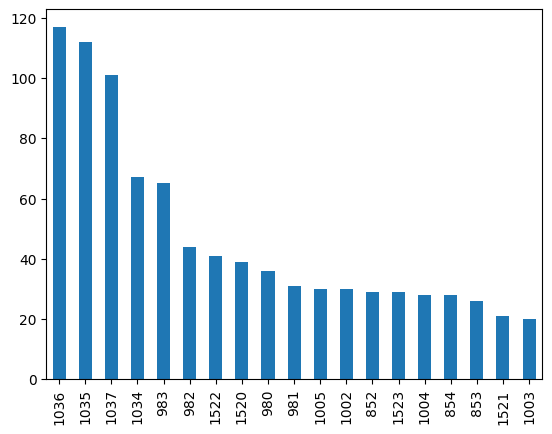

In [23]:
df_vendas['LojaID'].value_counts(ascending=False).plot.bar()

Receita por ano

<AxesSubplot: ylabel='Receita'>

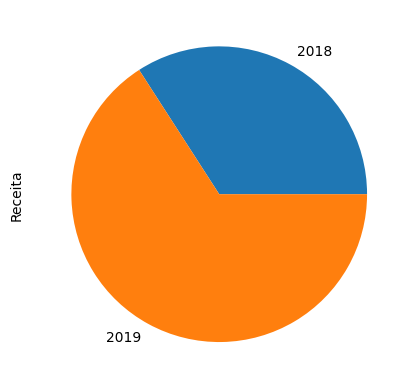

In [24]:
df_vendas.groupby(df_vendas['Data'].dt.year)['Receita'].sum().plot.pie()

Vendas por cidade

Text(0, 0.5, 'Total de Vendas')

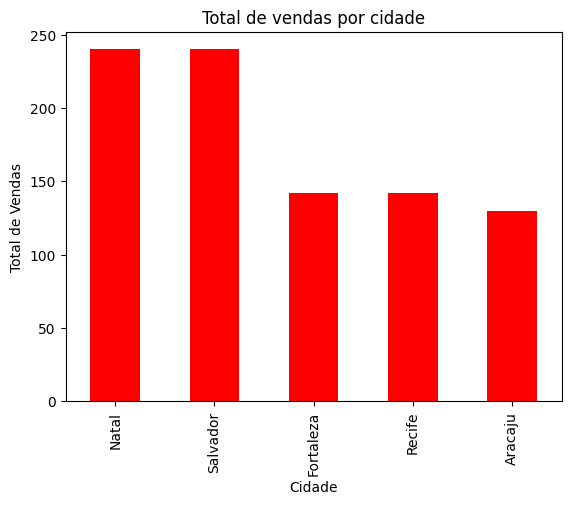

In [25]:
df_vendas['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade',
                                            color='red')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas')

Receita por mês e 
personalizando a apresentação dos gráficos

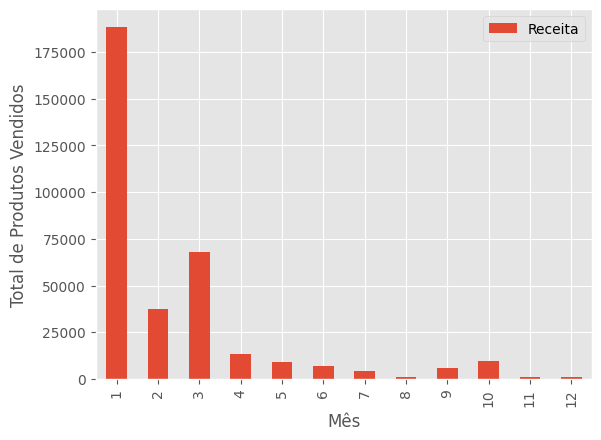

In [27]:
plt.style.use('ggplot')
df_vendas.groupby(df_vendas['Data'].dt.month)['Receita'].sum().plot.bar()
plt.xlabel('Mês')
plt.ylabel('Total de Produtos Vendidos')
plt.legend()

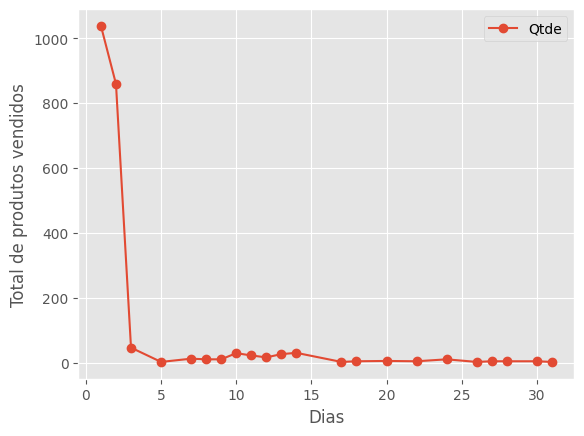

In [28]:
df_vendas2019.groupby(df_vendas2019['Data'].dt.day)[
    'Qtde'].sum().plot(marker='o')
plt.xlabel('Dias')
plt.ylabel('Total de produtos vendidos')
plt.legend()

Quantidade de vendas por cidade em 2018

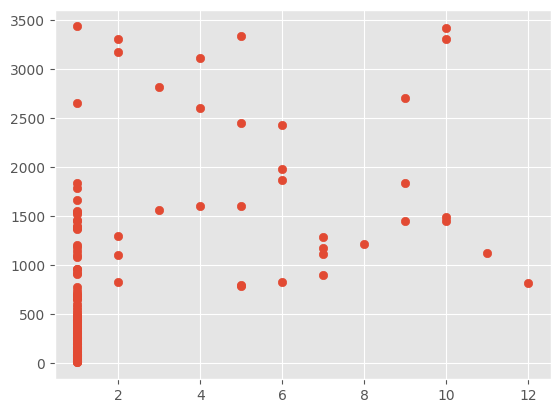

In [29]:
plt.scatter(x=df_vendas2018['Data'].dt.month,
            y=df_vendas2018['Receita'])